In [ ]:
import matplotlib.pyplot as plt
from utils import test_combinations, plot_results
from load_embeddings import load_embedding_model
# from wordlist import mammals, birds, colors, fruits
from wordlist import animals, colors, verbs, geo_objects, body_parts, adjectives, pronouns, p_cs

# model, tokenizer = load_embedding_model(
#     151936, 1536,
#     "embeddings_qwen.pth",
#     "unembeddings_qwen.pth",
#     "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"
# )
vocab_size = 151936
dimensions = 1536
project_dir = "/Users/wuyuchen/Desktop/SCCOT/" # adjust this path to yours
model, tokenizer = load_embedding_model(
    vocab_size,
    dimensions,
    f"{project_dir}/embeddings_qwen.pth",
    f"{project_dir}/unembedding_qwen.pth",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"
)
model.eval()

/Users/wuyuchen/Desktop/superposition-in-continuous-chain-of-thought/load_embeddings.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb_weight = torch.load(embeddings_

SimpleModel(
  (embedding): Embedding(151936, 1536)
  (unembedding): Linear(in_features=1536, out_features=151936, bias=False)
)

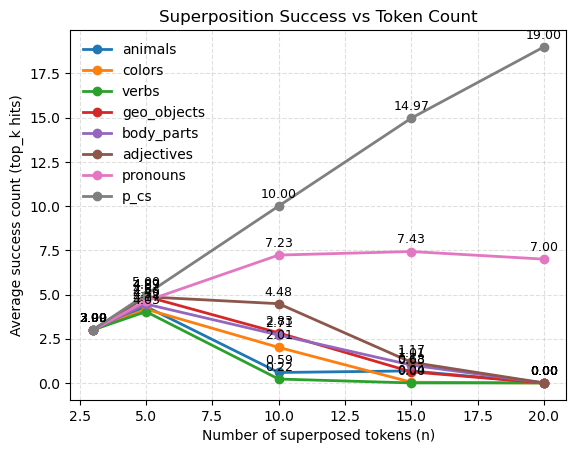

In [ ]:
res_animals = test_combinations(animals, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_colors = test_combinations(colors, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_verbs = test_combinations(verbs, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_geo_objects = test_combinations(geo_objects, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_body_parts = test_combinations(body_parts, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_adjectives = test_combinations(adjectives, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_pronouns = test_combinations(pronouns, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_p_cs = test_combinations(p_cs, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)

plot_results(res_animals, title="animals")
plot_results(res_colors, title="colors")
plot_results(res_verbs, title="verbs")
plot_results(res_geo_objects, title="geo_objects")
plot_results(res_body_parts, title="body_parts")
plot_results(res_adjectives, title="adjectives")
plot_results(res_pronouns, title="pronouns")
plot_results(res_p_cs, title="p_cs")

plt.show()

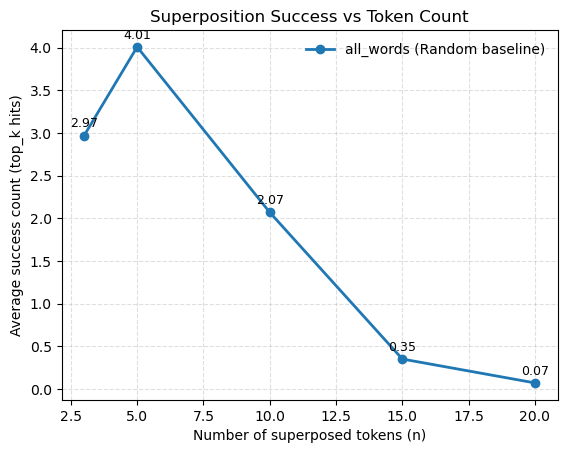

In [6]:
all_words = animals + colors + verbs + geo_objects + body_parts + adjectives + pronouns + p_cs
res_all_words = test_combinations(all_words, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
plot_results(res_all_words, title="all_words (Random baseline)")
plt.show()

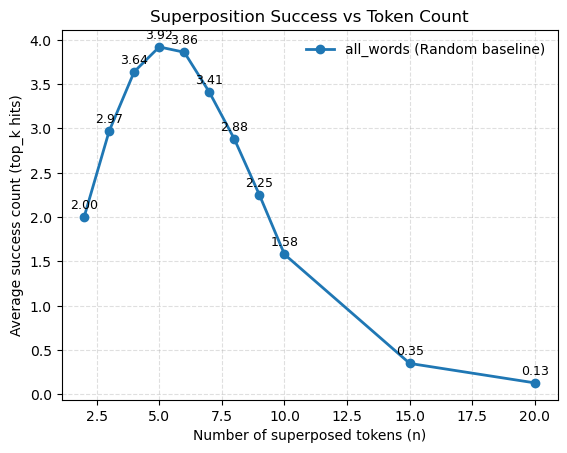

In [7]:
all_words = animals + colors + verbs + geo_objects + body_parts + adjectives + pronouns + p_cs
res_all_words = test_combinations(all_words, model, tokenizer, n_values=[2,3,4,5,6,7,8,9,10,15,20], num_trials=100, top_k=30)
plot_results(res_all_words, title="all_words (Random baseline)")
plt.show()

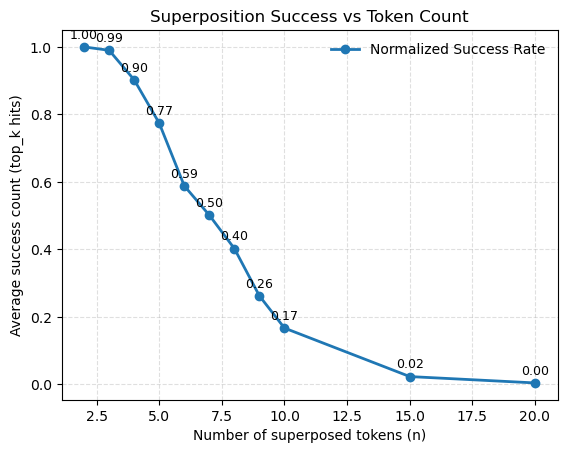

In [ ]:
all_words = animals + colors + verbs + geo_objects + body_parts + adjectives + pronouns + p_cs
res_all_words = test_combinations(all_words, model, tokenizer, n_values=[2,3,4,5,6,7,8,9,10,15,20], num_trials=100, top_k=30)
normalized = {n: val/n for n, val in res_all_words.items()}
plot_results(normalized, title="Normalized Success Rate")
plt.ylim(0, 1.1)
plt.show()

In [3]:
import torch
import os
from transformers import AutoTokenizer, AutoModelForCausalLM

project_dir = "/home/comp/f2256768/SCCOT/models/qwen3_4b"

tokenizer = AutoTokenizer.from_pretrained(
    project_dir,
    local_files_only=True,
    trust_remote_code=True,
)

vocab_size = tokenizer.vocab_size
print("Vocab size:", vocab_size)

model = AutoModelForCausalLM.from_pretrained(
    project_dir,
    local_files_only=True,
    trust_remote_code=True,
    torch_dtype="auto",
    device_map="cpu",
)

embeddings = model.get_input_embeddings().weight.detach().cpu()
print("Embedding dimension:", embeddings.shape)

unembedding = model.get_output_embeddings().weight.detach().cpu()
print("Unembedding dimension:", unembedding.shape)

emb_path = os.path.join(project_dir, "embeddings_qwen.pth")
unemb_path = os.path.join(project_dir, "unembedding_qwen.pth")

torch.save(embeddings, emb_path)
torch.save(unembedding, unemb_path)

print("Saved:")
print("  ", emb_path)
print("  ", unemb_path)

Vocab size: 151643


`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]


Embedding dimension: torch.Size([151936, 2560])
Unembedding dimension: torch.Size([151936, 2560])
Saved:
   /home/comp/f2256768/SCCOT/models/qwen3_4b/embeddings_qwen.pth
   /home/comp/f2256768/SCCOT/models/qwen3_4b/unembedding_qwen.pth


In [28]:
import matplotlib.pyplot as plt
from utils import test_combinations, plot_results
from load_embeddings import load_embedding_model
# from wordlist import mammals, birds, colors, fruits
from wordlist import animals, colors, verbs, geo_objects, body_parts, adjectives, pronouns, p_cs

vocab_size = 151936
dimensions = 2560

project_dir = "/home/comp/f2256768/SCCOT/models/qwen3_4b"
model, tokenizer = load_embedding_model(
    vocab_size,
    dimensions,
    f"{project_dir}/embeddings_qwen.pth",
    f"{project_dir}/unembedding_qwen.pth",
    project_dir,
)
model.eval()

SimpleModel(
  (embedding): Embedding(151936, 2560)
  (unembedding): Linear(in_features=2560, out_features=151936, bias=False)
)

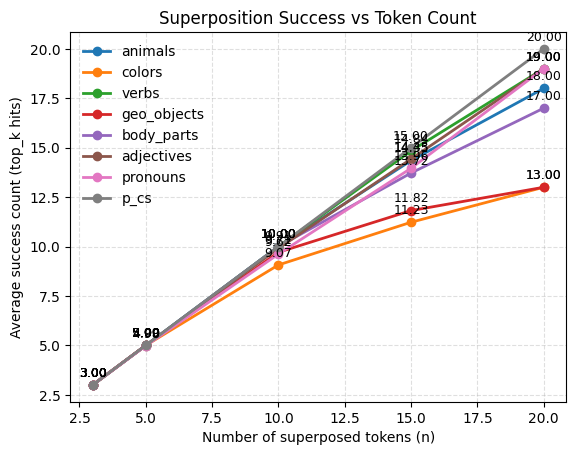

In [5]:
res_animals = test_combinations(animals, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_colors = test_combinations(colors, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_verbs = test_combinations(verbs, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_geo_objects = test_combinations(geo_objects, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_body_parts = test_combinations(body_parts, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_adjectives = test_combinations(adjectives, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_pronouns = test_combinations(pronouns, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_p_cs = test_combinations(p_cs, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)

plot_results(res_animals, title="animals")
plot_results(res_colors, title="colors")
plot_results(res_verbs, title="verbs")
plot_results(res_geo_objects, title="geo_objects")
plot_results(res_body_parts, title="body_parts")
plot_results(res_adjectives, title="adjectives")
plot_results(res_pronouns, title="pronouns")
plot_results(res_p_cs, title="p_cs")

plt.show()

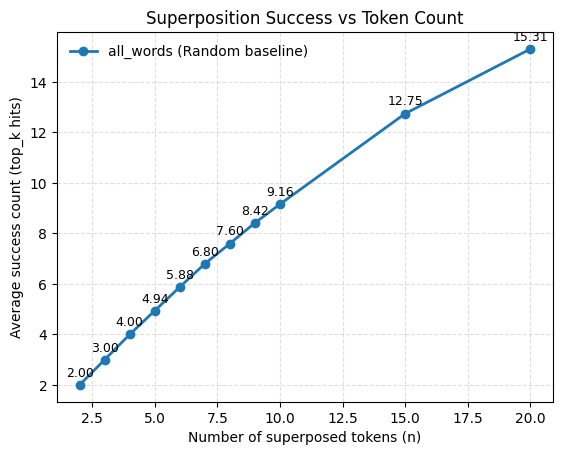

In [18]:
all_words = animals + colors + verbs + geo_objects + body_parts + adjectives + pronouns + p_cs
res_all_words = test_combinations(all_words, model, tokenizer, n_values=[2,3,4,5,6,7,8,9,10,15,20], num_trials=100, top_k=30)
plot_results(res_all_words, title="all_words (Random baseline)")
plt.show()

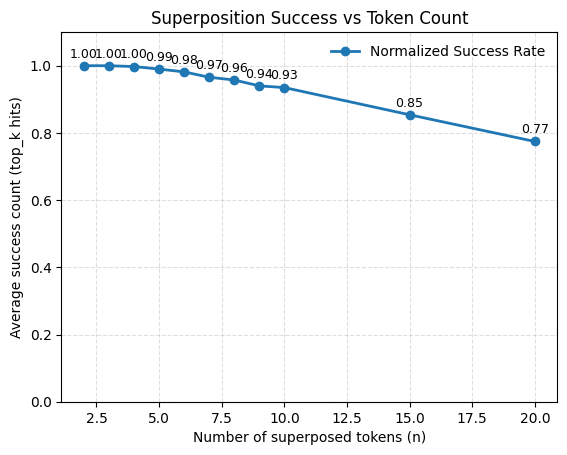

In [21]:
all_words = animals + colors + verbs + geo_objects + body_parts + adjectives + pronouns + p_cs
res_all_words = test_combinations(all_words, model, tokenizer, n_values=[2,3,4,5,6,7,8,9,10,15,20], num_trials=100, top_k=30)
normalized = {n: val/n for n, val in res_all_words.items()}
plot_results(normalized, title="Normalized Success Rate")
plt.ylim(0, 1.1)
plt.show()

In [8]:
import torch
import os
from transformers import AutoTokenizer, AutoModelForCausalLM

model_dir = "/home/comp/f2256768/SCCOT/models/deepseek_7b"

tokenizer = AutoTokenizer.from_pretrained(
    model_dir,
    local_files_only=True,
    trust_remote_code=True,
)
vocab_size = tokenizer.vocab_size
print("Vocab size:", vocab_size)

model = AutoModelForCausalLM.from_pretrained(
    model_dir,
    local_files_only=True,
    trust_remote_code=True,
    torch_dtype="auto",
    device_map="cpu",
)

embeddings = model.get_input_embeddings().weight.detach().cpu()
print("Embedding weight shape:", embeddings.shape)

unembedding = model.get_output_embeddings().weight.detach().cpu()
print("Unembedding weight shape:", unembedding.shape)

emb_path = os.path.join(model_dir, "embeddings_deepseek_7b.pth")
unemb_path = os.path.join(model_dir, "unembedding_deepseek_7b.pth")

torch.save(embeddings, emb_path)
torch.save(unembedding, unemb_path)

print("Saved:")
print("  ", emb_path)
print("  ", unemb_path)

Vocab size: 151643


Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.93s/it]


Embedding weight shape: torch.Size([152064, 3584])
Unembedding weight shape: torch.Size([152064, 3584])
Saved:
   /home/comp/f2256768/SCCOT/models/deepseek_7b/embeddings_deepseek_7b.pth
   /home/comp/f2256768/SCCOT/models/deepseek_7b/unembedding_deepseek_7b.pth


In [22]:
import matplotlib.pyplot as plt
from utils import test_combinations, plot_results
from load_embeddings import load_embedding_model
# from wordlist import mammals, birds, colors, fruits
from wordlist import animals, colors, verbs, geo_objects, body_parts, adjectives, pronouns, p_cs

vocab_size = 152064
dimensions = 3584

project_dir = "/home/comp/f2256768/SCCOT/models/deepseek_7b"
model, tokenizer = load_embedding_model(
    vocab_size,
    dimensions,
    f"{project_dir}/embeddings_deepseek_7b.pth",
    f"{project_dir}/unembedding_deepseek_7b.pth",
    project_dir,
)
model.eval()

SimpleModel(
  (embedding): Embedding(152064, 3584)
  (unembedding): Linear(in_features=3584, out_features=152064, bias=False)
)

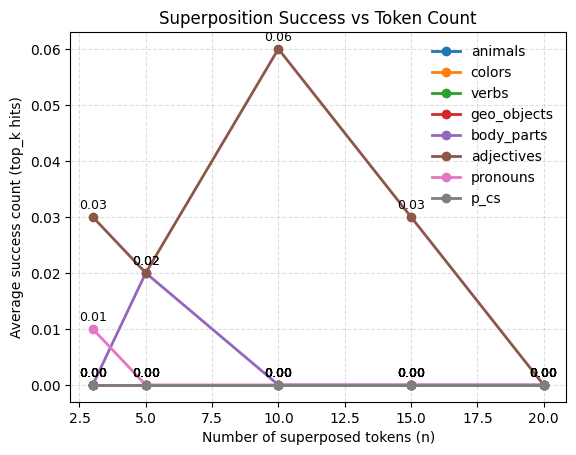

In [11]:
res_animals = test_combinations(animals, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_colors = test_combinations(colors, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_verbs = test_combinations(verbs, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_geo_objects = test_combinations(geo_objects, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_body_parts = test_combinations(body_parts, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_adjectives = test_combinations(adjectives, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_pronouns = test_combinations(pronouns, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_p_cs = test_combinations(p_cs, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)

plot_results(res_animals, title="animals")
plot_results(res_colors, title="colors")
plot_results(res_verbs, title="verbs")
plot_results(res_geo_objects, title="geo_objects")
plot_results(res_body_parts, title="body_parts")
plot_results(res_adjectives, title="adjectives")
plot_results(res_pronouns, title="pronouns")
plot_results(res_p_cs, title="p_cs")

plt.show()

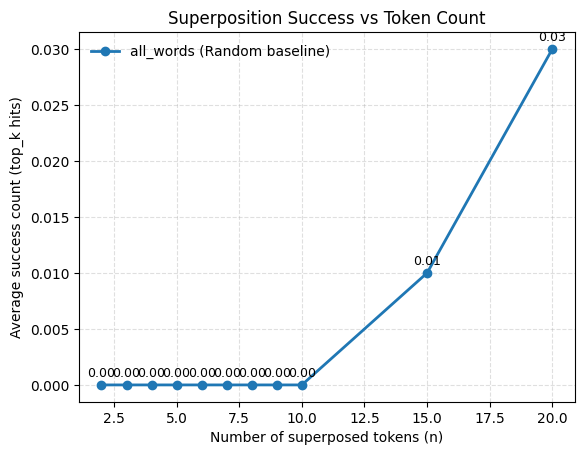

In [13]:
all_words = animals + colors + verbs + geo_objects + body_parts + adjectives + pronouns + p_cs
res_all_words = test_combinations(all_words, model, tokenizer, n_values=[2,3,4,5,6,7,8,9,10,15,20], num_trials=100, top_k=30)
plot_results(res_all_words, title="all_words (Random baseline)")
plt.show()

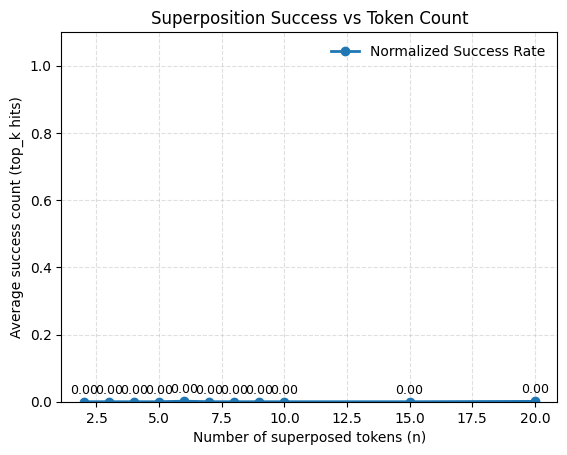

In [23]:
all_words = animals + colors + verbs + geo_objects + body_parts + adjectives + pronouns + p_cs
res_all_words = test_combinations(all_words, model, tokenizer, n_values=[2,3,4,5,6,7,8,9,10,15,20], num_trials=100, top_k=30)
normalized = {n: val/n for n, val in res_all_words.items()}
plot_results(normalized, title="Normalized Success Rate")
plt.ylim(0, 1.1)
plt.show()

In [25]:
import matplotlib.pyplot as plt

def plot_results2(results, label=None):
    ks = sorted(results.keys())
    ys = [results[k] for k in ks]

    plt.figure()
    plt.plot(ks, ys, marker="o", label=label)
    plt.xlabel("k (number of superposed tokens)")
    plt.ylabel("Recall@K")
    plt.ylim(0.0, 1.05)
    plt.grid(alpha=0.3)
    if label is not None:
        plt.legend()
    plt.tight_layout()

In [ ]:
all_words = animals + colors + verbs + geo_objects + body_parts + adjectives + pronouns + p_cs
res_all_words = test_combinations(
    all_words,
    model,
    tokenizer,
    n_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    num_trials=100,
    top_k=30,
)

recall_at_k = {k: hits / k for k, hits in res_all_words.items()}
plot_results2(recall_at_k, label="DeepSeek-R1-Distill-Qwen-1.5B")
plt.show()

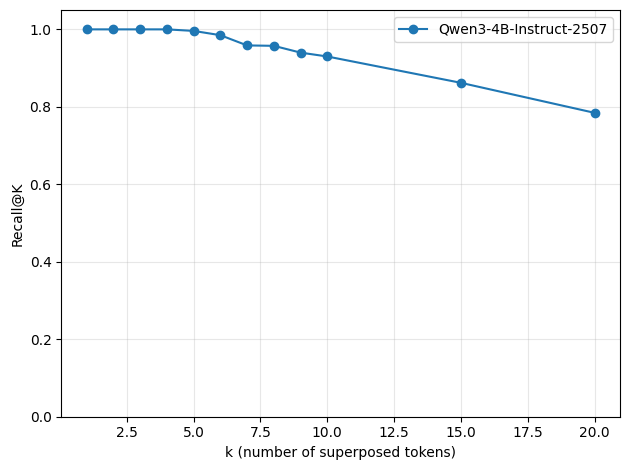

In [29]:
all_words = animals + colors + verbs + geo_objects + body_parts + adjectives + pronouns + p_cs
res_all_words = test_combinations(
    all_words,
    model,
    tokenizer,
    n_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    num_trials=100,
    top_k=30,
)

recall_at_k = {k: hits / k for k, hits in res_all_words.items()}
plot_results2(recall_at_k, label="Qwen3-4B-Instruct-2507")
plt.show()

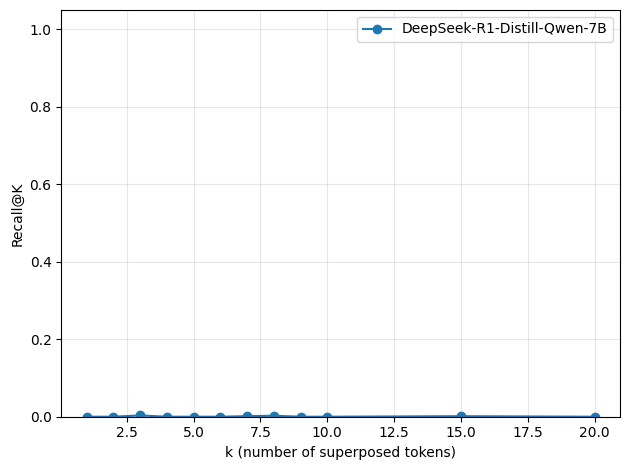

In [27]:
all_words = animals + colors + verbs + geo_objects + body_parts + adjectives + pronouns + p_cs
res_all_words = test_combinations(
    all_words,
    model,
    tokenizer,
    n_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    num_trials=100,
    top_k=30,
)

recall_at_k = {k: hits / k for k, hits in res_all_words.items()}
plot_results2(recall_at_k, label="DeepSeek-R1-Distill-Qwen-7B")
plt.show()